In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np 
import pandas as pd
import sklearn as skl


### Jeux de données artificiel

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 60000 , 
                           n_features = 25 , 
                           n_informative = 15 ,
                           n_redundant = 0 , 
                           n_repeated = 0 , 
                           n_classes = 2 ,
                           n_clusters_per_class = 1 ,
                           weights =[ 0.99 , 0.01 ] ,
                           class_sep = 1.0 , 
                           random_state = 0 )

### Transformations en dataframe

In [3]:
# Variables explicatives :

X_var = [ 'x_' + str( k ) for k in range( 0 , X.shape[1] ) ]

# Variable à expliquer :

y_var = [ 'y' ]

# Dataframes : 

df_X = pd.DataFrame( X , columns = X_var )

df_y = pd.DataFrame( y , columns = y_var )

# Empilement de df_X et df_y :

df = pd.concat( [ df_X , df_y ] , axis = 1 )

### Train / Test split

In [12]:
from sklearn.model_selection import train_test_split


df_train_all , df_test = train_test_split( df , train_size = 0.9 )

df_train_0 = df_train_all[ df_train_all[ 'y' ] == 0 ]
df_train_1 = df_train_all[ df_train_all[ 'y' ] == 1 ]

print( 'df_train_all : {0}'.format( df_train_all.shape ) )
print( 'df_train_0 : {0}'.format( df_train_0.shape ) )
print( 'df_train_1 : {0}'.format( df_train_1.shape ) )

print( 'df_test : {0}'.format( df_test.shape ) )

# train dataset :

df_X_train_all = df_train_all[ X_var ]
df_y_train_all = df_train_all[ y_var ]

X_train_all = df_X_train_all.values
y_train_all = np.ravel( df_y_train_all.values )

# test dataset :

df_X_test = df_test[ X_var ]
df_y_test = df_test[ y_var ]

X_test = df_X_test.values
y_test = np.ravel( df_y_test.values )

df_train_all : (54000, 26)
df_train_0 : (53197, 26)
df_train_1 : (803, 26)
df_test : (6000, 26)


C:\Users\FAB\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Librairies pour modélisation :

In [10]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
 

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import pickle

### Modèle Baseline :

In [22]:
# Modèle de référence ( RandomForest ) pour comparaison avec modèle cible ( RandomJungle )

clf = RandomForestClassifier( n_estimators = 10 )

clf.fit( X_train_all , y_train_all )

# Sauvegarde du modèle sur disque
filename = './mdl/_mdl' + '.sav'
pickle.dump( clf , open( filename , 'wb' ) )
    
    
# Prédictions sur test dataset
y_test_pred = clf.predict( X_test )
    
# Matrice de confusion sur test dataset
cfu_mtx = confusion_matrix( y_test , y_test_pred )
    
# AUC sur test dataset
auc = roc_auc_score( y_test , y_test_pred )
    
#print( 'confusion matrix (test dataset):\n {0}'.format( cfu_mtx ) )
print( 'baseline | auc (test dataset) : \n {0:.2f}'.format( auc ) )
print( 'baseline | confusion matrix (test dataset) : \n {0}'.format( cfu_mtx ) )

baseline | auc (test dataset) : 
 0.60
baseline | confusion matrix (test dataset) : 
 [[5904    1]
 [  76   19]]


### <font : color = 'orange'> Modèle RandomJungle = K RandomForest </font>

In [18]:
def RandomJungle( N , K ) :
    
    """
     BaseLine vs RandomForest : 
      * N : nombre d'expériences 
      * K : nombre d'échantillons de cas négatifs mis en face des cas positifs
      
      Expérience : K tirages dans les cas négatifs mis en face des cas positifs
    """
    
    lst_bsl_auc = []
    lst_randjgl_auc = []
    
    for i in range( N ) :
        
        # [ 0 ] Train / test split :
        df_train_all , df_test = train_test_split( df , train_size = 0.9 , test_size = 0.1 )

        df_train_0 = df_train_all[ df_train_all[ 'y' ] == 0 ]
        df_train_1 = df_train_all[ df_train_all[ 'y' ] == 1 ]
        
        # [ 0.1 ] train dataset :

        df_X_train_all = df_train_all[ X_var ]
        df_y_train_all = df_train_all[ y_var ]

        X_train_all = df_X_train_all.values
        y_train_all = np.ravel( df_y_train_all.values )

        # [ 0.2 ] test dataset :

        df_X_test = df_test[ X_var ]
        df_y_test = df_test[ y_var ]

        X_test = df_X_test.values
        y_test = np.ravel( df_y_test.values )
        
        # [ 1 ] Baseline :
        
        clf = RandomForestClassifier( n_estimators = 100 )
        #clf = svm.LinearSVC()
        #clf = LogisticRegression( random_state=0, solver='lbfgs', multi_class='ovr')
        #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2) ) 
        #clf =  AdaBoostClassifier()
        #clf = QuadraticDiscriminantAnalysis()
        #clf = GaussianNB()
        
        clf.fit( X_train_all , y_train_all )
        y_test_pred = clf.predict( X_test )
        auc = roc_auc_score( y_test , y_test_pred )
        lst_bsl_auc.append( auc )
        print( '[ i : {0} | baseline | auc ( test dataset ) : {1:.4f} ]'.format( i , auc ) )
        
        
        # [ 2 ] RandomJungle :
        
        # Dictionnaire pour stockage des K prédictions
        #pred_train = {}
        
        lst_auc = []
        # RandomJungle - Taille des échantillons à mettre en face des fraudes :
        spl_siz = len( df_train_1.index )
        
        # RandomJungle - K RandomForest()
        for j in range( 0 , K ) :
            # RandomJungle - train dataset - échantillon de sinistres non fraude (autant que de sinistres fraude dans le train dataset)
            df_train_0_spl = df_train_0.sample( n =  spl_siz ) 
            # RandomJungle - train dataset - concaténation des sinistres fraude et de l'échantillon de sinistres non fraude
            df_tmp = pd.concat( [ df_train_1 , df_train_0_spl ] , axis = 0 )
    
            df_X_train = df_tmp[ X_var ]
            df_y_train = df_tmp[ y_var ]
    
            X_train = df_X_train.values
            y_train = np.ravel( df_y_train.values )
    
            clf = RandomForestClassifier( n_estimators = 100 )
            #clf = svm.LinearSVC()
            #clf = LogisticRegression( solver='lbfgs', multi_class='ovr' )
            #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2) ) 
            #clf =  AdaBoostClassifier()
            #clf = QuadraticDiscriminantAnalysis()
            #clf = GaussianNB()
            
            clf.fit( X_train , y_train )
     
            # RandomJungle - Sauvegarde des modèles sur disque
            filename = './mdl/_mdl_' + str( i ) + '_' + str( j ) + '.sav'
            pickle.dump( clf , open( filename , 'wb' ) )
    
            # RandomJungle - Prédictions sur test dataset
            y_test_pred = clf.predict( X_test )
    
            # RandomJungle - AUC sur test dataset
            auc = roc_auc_score( y_test , y_test_pred )
            lst_auc.append( auc )
            #print( 'i : {0} | j : {1} | RandomForest | auc (test dataset) : \n {2}'.format( i , j , auc ) )
    
        
        pred = {}

        for j in range( K ) :
            filename = './mdl/_mdl_' + str( i ) + '_' + str( j ) + '.sav'
            clf = pickle.load( open( filename , 'rb' ) )
            y_test_pred = clf.predict( X_test )
            col = 'y_pred_' + str( j )
            pred[ col ] = y_test_pred
    
        df_X_test_pred = pd.DataFrame( pred )
        df_X_test_pred = df_X_test_pred[ sorted( df_X_test_pred.columns ) ]
        
        df_X_test_pred[ 'cons' ] = df_X_test_pred.sum( axis = 1 ).apply( lambda x : ( K - x ) / K )
        df_X_test_pred[ 'y_pred' ] = np.where( df_X_test_pred[ 'cons' ] < 0.50 , 1 , 0 )
        df_X_test_pred[ 'y_real' ] = y_test
        
        auc = roc_auc_score( y_test , df_X_test_pred[ 'y_pred' ] )
        print( '[ i : {0} | RandomJungle | auc ( test dataset ) : {1:.4f} ]'.format( i , auc ) )
        lst_randjgl_auc.append( auc )
 
    return lst_bsl_auc , lst_randjgl_auc 

In [19]:
bsl_vs_randjgl_auc = RandomJungle( N = 10 , K = 500 )

[ i : 0 | baseline | auc ( test dataset ) : 0.5746 ]


KeyboardInterrupt: 

### Modèle Baseline vs RandomJungle

In [16]:
from scipy.stats import ttest_ind


np.mean( bsl_vs_randjgl_auc[1] )

np.std( bsl_vs_randjgl_auc[1] )


# Différence significative entre AUC modèle Baseline vs RandomJungle :

ttest_ind( bsl_vs_randjgl_auc[0] , bsl_vs_randjgl_auc[1] )

Ttest_indResult(statistic=-24.84841468338586, pvalue=2.2061887261919884e-15)

### Graphe : AUC modèle Baseline vs RandomJungle :

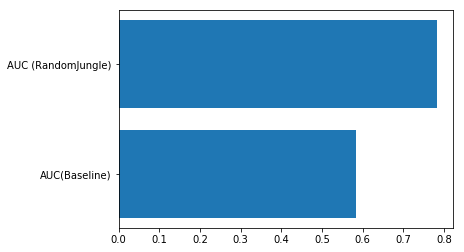

In [17]:
import matplotlib.pyplot as plt

h = [ np.mean( bsl_vs_randjgl_auc[0] ) , np.mean( bsl_vs_randjgl_auc[1] ) ]
bar_lbl = [ 'AUC(Baseline)' , 'AUC (RandomJungle)' ]
y_pos = np.arange( len( bar_lbl ) )

plt.barh( y_pos , h )

plt.yticks( y_pos , bar_lbl )

plt.show()

In [34]:
from sklearn.decomposition import PCA 

from sklearn.preprocessing import scale


pca = PCA( n_components = 15 )


# Non fraudes :

df_X_train_1 = df_train_1[ X_var ]

df_X_train_1_scl = scale( df_X_train_1 )

pca.fit_transform( df_X_train_1_scl )

sum( pca.explained_variance_ratio_ )


0.7910356704740045

In [35]:
from sklearn.cluster import KMeans

K = 10

clus = KMeans( n_clusters = K , n_init = 10 , random_state = 1 )

clus.fit( df_X_train_1_scl )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [36]:
df_X_train_1_scl.shape

(817, 25)

In [31]:
clus.labels_

array([2, 8, 6, 6, 0, 3, 1, 5, 8, 9, 6, 9, 5, 0, 4, 8, 0, 3, 1, 7, 5, 0,
       6, 0, 3, 7, 8, 3, 2, 1, 8, 9, 8, 0, 4, 0, 3, 2, 4, 1, 1, 4, 4, 7,
       8, 0, 3, 8, 2, 4, 1, 1, 8, 6, 5, 7, 6, 2, 6, 3, 9, 5, 8, 5, 6, 6,
       0, 6, 2, 9, 6, 0, 6, 7, 2, 5, 6, 2, 4, 2, 7, 0, 3, 1, 4, 7, 3, 9,
       8, 2, 1, 7, 7, 8, 3, 8, 7, 2, 9, 4, 9, 7, 9, 7, 8, 3, 1, 9, 1, 7,
       7, 3, 1, 9, 3, 5, 2, 0, 9, 6, 8, 0, 3, 9, 2, 2, 3, 6, 0, 8, 4, 9,
       7, 9, 2, 8, 9, 4, 5, 9, 9, 5, 2, 7, 7, 9, 5, 1, 0, 0, 1, 4, 5, 8,
       5, 2, 9, 4, 0, 5, 9, 2, 0, 4, 5, 0, 5, 6, 9, 3, 7, 5, 1, 9, 3, 1,
       5, 9, 2, 3, 5, 5, 0, 1, 5, 0, 6, 0, 6, 6, 8, 0, 3, 5, 5, 1, 9, 8,
       5, 0, 4, 1, 5, 3, 7, 9, 0, 9, 4, 2, 0, 8, 2, 7, 5, 2, 8, 5, 2, 5,
       9, 7, 4, 9, 4, 1, 3, 3, 7, 4, 0, 2, 4, 2, 9, 1, 4, 3, 8, 5, 1, 5,
       4, 4, 4, 1, 5, 6, 2, 5, 5, 1, 9, 5, 4, 4, 1, 1, 8, 6, 6, 2, 7, 8,
       7, 4, 1, 5, 4, 3, 4, 8, 8, 3, 2, 6, 8, 4, 7, 5, 5, 2, 9, 2, 7, 1,
       7, 6, 3, 9, 2, 6, 3, 4, 7, 2, 6, 3, 9, 7, 7,

In [33]:
clus.transform( pca.fit_transform( scale( df_train_0[ X_var ] ) ) )

ValueError: Incorrect number of features. Got 15 features, expected 25